# Linear Regression

in KNN classification, we represent plot in two features, but in linear regression we plot(simple linear regression) in one result and one feature


### **env setup**

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

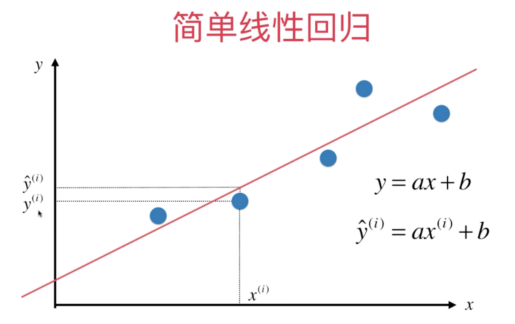

In [ ]:
display_drive_image('linear_reg.png')

y^ here is the predict y_pred
for each sample data x, it have one actual val and one predict val,
Our goal is to minimize the distance between y_pred and y_train

* $\widehat{y}^{(i)}$ is y_predict
* $y^{i}$ is y_test
* $x^{(i)}$ is x_test

* So we want difference between y_test and y_predict is minimum
  * so we want $\sum_{i=1}^{m} \left( y^{(i)} - \widehat{y}^{(i)} \right)^2$ is minimum

$\because$ $\sum_{i=1}^{m} \left( y^{(i)} - \widehat{y}^{(i)} \right)^2$ and  $\widehat{y}^{(i)} = ax^{(i)} - b $
  
$\therefore$ $\sum_{i=1}^{m} \left( y^{(i)} - ax^{(i)} - b \right)^2$


so the goal of linear regression model is to find $a$ and $b$ that minimize $\sum_{i=1}^{m} \left( y^{(i)} - ax^{(i)} - b \right)^2$
* this function is also called loss function(want to minimize) or utility function(want to maximize) depends on different case




* $\bar{y}$ is mean of $y$

$a = \frac{\sum_{i=1}^{m} \left( x^{(i)} - \bar{x} \right)\left( y^{(i)} - \bar{y} \right)}{\sum_{i=1}^{m} \left( x^{(i)} - \bar{x} \right)^2}$

$b = \bar{y} - a\bar{x}$

## **simple LR**

In [ ]:
x = np.array([1,2,3,4,5])
y = np.array([1,3,2,3,5])

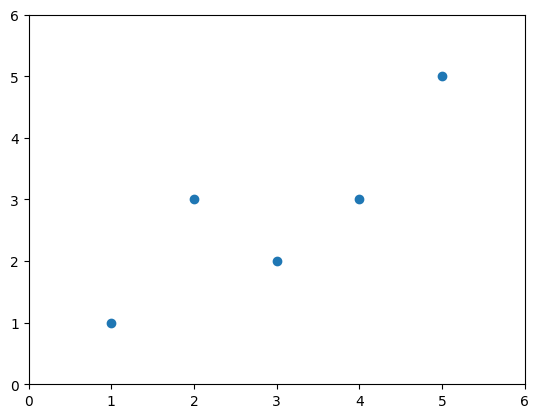

In [ ]:
plt.scatter(x,y)
plt.axis([0,6,0,6])
plt.show()

In [ ]:
# find y_bar and x_bar
x_mean = np.mean(x)
y_mean = np.mean(x)


$a = \frac{\sum_{i=1}^{m} \left( x^{(i)} - \bar{x} \right)\left( y^{(i)} - \bar{y} \right)}{\sum_{i=1}^{m} \left( x^{(i)} - \bar{x} \right)^2}$

$b = \bar{y} - a\bar{x}$

loss function:

$\because$ $\sum_{i=1}^{m} \left( y^{(i)} - \widehat{y}^{(i)} \right)^2$, $\widehat{y}^{(i)} = ax^{(i)} - b $
  
$\therefore$ $\sum_{i=1}^{m} \left( y^{(i)} - ax^{(i)} - b \right)^2$


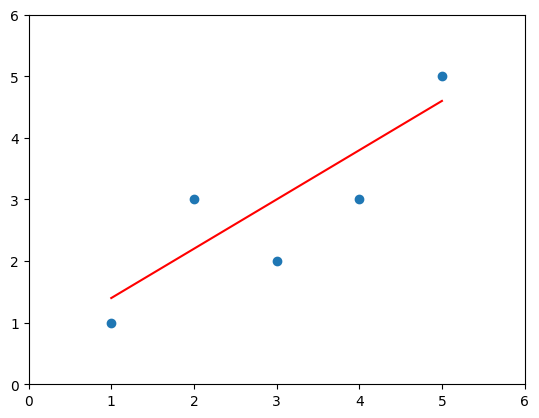

In [ ]:
a_numerator = 0.0
a_denominator = 0.0

for x_i, y_i in zip(x,y):
  a_numerator += (x_i - x_mean) * (y_i - y_mean)
  a_denominator += (x_i - x_mean)**2
a = a_numerator / a_denominator

b = y_mean - a * x_mean

y_pred = a * x + b

plt.scatter(x, y)
plt.plot(x, y_pred, color = 'r')
plt.axis([0,6,0,6])
plt.show()

**calculate as vector is faster(avoid for loop)**


*   $a = \frac{\sum_{i=1}^{m} \left( x^{(i)} - \bar{x} \right)\left( y^{(i)} - \bar{y} \right)}{\sum_{i=1}^{m} \left( x^{(i)} - \bar{x} \right)^2}$
*   numerator = (x_train - x_mean).dot(y_train - y_mean)
*  demoninator = (x_train - x_mean).dot(x_train - x_mean)
* using vector operation instead of using for-loop , save 90% of time





In [ ]:
class HandCraft_simple_LR_vector:
  def _init_(self):
    self.a = None
    self.b = None
  def fit(self, x_train, y_train):
    # check x_train's demension
    assert x_train.ndim == 1, \
      "simple LR can only solve single feature training data"
    assert len(x_train) == len(y_train), \
      "size of x_train must be equal to size of y_train"

    x_mean = np.mean(x_train)
    y_mean = np.mean(y_train)

    a_numerator = 0.0
    a_denominator = 0.0
    # method 1: for-loop method, slower
    # for x_i, y_i in zip(x,y):
    #   a_numerator += (x_i - x_mean) * (y_i - y_mean)
    #   a_denominator += (x_i - x_mean)**2
    #
    # method2 : vector
    a_numerator = (x_train - x_mean).dot(y_train - y_mean)
    a_denominator = (x_train - x_mean).dot(x_train - x_mean)
    self.a = a_numerator / a_denominator
    self.b = y_mean - self.a * x_mean
    return self

  def predict(self, x_predict):
    assert x_predict.ndim == 1, \
      "simple LR can only solve single feature training data"
    assert self.a is not None and self.b is not None, \
      "must fit before predict"
    y_pred = self.a * x_predict + self.b
    return y_pred




## Metrics



### MSE(mean square error)

$
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} \left( y_{\text{test}}^{(i)} - y_{\text{pred}}^{(i)} \right)^2
$




In [ ]:
# cali = datasets.fetch_california_housing()
diabetes = datasets.load_diabetes()
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [ ]:
diabetes.feature_names[2]

'bmi'

In [ ]:
# only access third feature (bmi) of cali dataset
X = diabetes.data[:,2]
# The target variable is the median house value for California districts,
  # expressed in hundreds of thousands of dollars ($100,000).
y = diabetes.target
print(f'{X.shape}, {y.shape}')

(442,), (442,)


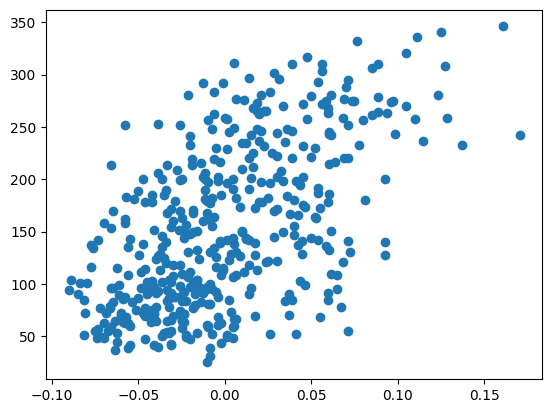

In [ ]:
plt.scatter(X,y)
plt.show()

In [ ]:
def train_test_split(X, y, test_ration = 0.2, seed=None):
  assert X.shape[0] == y.shape[0], \
    "the size of x must be equal to the size of y"
  assert 0.0 <= test_ration <= 1.0, \
    "ration of test data must be valid"
  if seed:
    np.random.seed(seed)

  # random the indexs within len(x)
  shuffle_indexes = np.random.permutation(len(X))

  test_size = int(len(X) * test_ration)
  test_indexes = shuffle_indexes[:test_size]
  train_indexes = shuffle_indexes[test_size:]

  x_train = X[train_indexes]
  y_train = y[train_indexes]

  x_test = X[test_indexes]
  y_test = y[test_indexes]

  return x_train, x_test, y_train, y_test

2. Purpose of the **seed** Parameter:

* Random seed is a value used to initialize the random number generator. Setting a specific seed ensures that the random number generator produces the same sequence of random numbers each time you run the code. This makes the random processes repeatable and allows for consistent results in experiments.

* If you pass a value for the seed (e.g., seed=42), it ensures that the random shuffling of the dataset happens in the same way each time you run the function. This is particularly useful for debugging or when you want reproducible results in experiments.
* If you do not provide a seed (seed=None), the random number generator will use a different seed each time (based on system time or another unpredictable source), so the split will be different each time the function is called.

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y)
simpleLR = HandCraft_simple_LR_vector()
simpleLR.fit(x_train, y_train)
print(simpleLR.a)
print(simpleLR.b)


947.3890728101657
153.65115109039667


<function matplotlib.pyplot.show(close=None, block=None)>

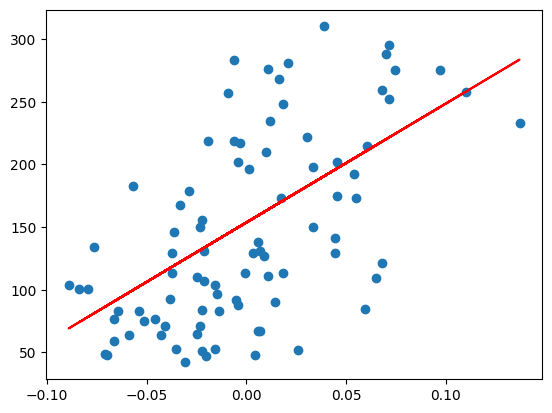

In [ ]:
plt.scatter(x_test, y_test)
y_pred = simpleLR.predict(x_test)
plt.plot(x_test, y_pred, color='r')
plt.show

**MSE**

$
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} \left( y_{\text{test}}^{(i)} - y_{\text{pred}}^{(i)} \right)^2
$



In [ ]:
mse_test = np.sum((y_pred - y_test)**2)/len(y_test)
mse_test

3765.798200019928


### RMSE (Root Mean Squared Error)
$
\text{RMSE} = \sqrt{ \frac{1}{n} \sum_{i=1}^{n} \left( y_{\text{test}}^{(i)} - y_{\text{pred}}^{(i)} \right)^2 }$

it means the average prediction error is around 61.366 in unit of diabetes progression

In [ ]:
RMSE = np.sqrt(mse_test)
RMSE

61.36609976216452

### MAE(mean absolute error)
$
\text{MAE} = \frac{1}{n} \sum_{i=1}^{n} \left| y_{\text{test}}^{(i)} - y_{\text{pred}}^{(i)} \right|
$

it means the average prediction error is around 61.366 in unit of diabetes progression


In [ ]:
mae_test = np.sum(np.absolute(y_pred - y_test))/len(y_test)
mae_test

51.891240311826216

In [ ]:
# running with self defined class code
print(f'mse is {metrics.mse(y_test, y_pred)}; rmse is {metrics.rmse(y_test,y_pred)}; mae is {metrics.mae(y_test,y_pred)}; acc_score is {metrics.accuracy_score(y_test, y_pred)}')

mse is 3765.798200019928; rmse is 61.36609976216452; mae is 51.891240311826216; acc_score is 0.0


### R square
why: MSE, MAE, RMSE can be used to access individual model, but to compare between models , we need R square
How:
* $R^2 = 1 - \frac{SS_{\text{residual}}}{SS_{\text{total}}} = 1 - \frac{\sum_{i} \left( \widehat{y}^{(i)} - y^{(i)} \right)^2}{\sum_{i} \left( \bar{y} - y^{(i)} \right)^2}$ = $R^2 = 1 - \frac{MSE(\hat{y}, y)}{Var(y)}$
* Where:
  * MSE(y_test, y_pred) = $\frac{1}{m} \sum_{i=1}^{m} (\widehat{y}^{(i)} - y^{(i)})^2$
  * Variance(y_test) = $\frac{1}{m} \sum_{i=1}^{m} (y^{(i)} - \bar{y})^2$

* $SS_{\text{residual}}$  =  ${\sum_{i} \left( \widehat{y}^{(i)} - y^{(i)} \right)^2}$ is mistake made using our model, (sum of square of( y_pred- y_test))
* $SS_{\text{total}}$ = ${\sum_{i} \left( \bar{y} - y^{(i)} \right)^2}$ is baseline model, which means using y_mean as y_pred

How to view $R^2$ value
* $R^2$ <= 1, when $R^2 = 1$ it means our model do make any mistake.
* when $R^2 = 0$, it means using our model is same as using baseline model(mean value as all predict value)
* when $R^2 < 0$ it means our model is worse than baseline model, more likely, our data doesn't have any linear relations
* we want the $R^2$ value as large as it can

## multiFeature LR
* consider x as vectors represent multiple features instead of one feature
*  $\because$ $\sum_{i=1}^{m} \left( y^{(i)} - \widehat{y}^{(i)} \right)^2$ and  $\widehat{y}^{(i)} = \theta_0 + \theta_1 X_1^{(i)} + \theta_2 X_2^{(i)} + \dots + \theta_n X_n^{(i)}$

and
* $\because$ $X_b = \begin{pmatrix}
1 & X_1^{(1)} & X_2^{(1)} & \dots & X_n^{(1)} \\
1 & X_1^{(2)} & X_2^{(2)} & \dots & X_n^{(2)} \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
1 & X_1^{(m)} & X_2^{(m)} & \dots & X_n^{(m)}
\end{pmatrix}$ and $\theta = \begin{pmatrix}
\theta_0 \\
\theta_1 \\
\theta_2 \\
\vdots \\
\theta_n
\end{pmatrix}$ and $\widehat{y} = X_b \cdot \theta$

* $\therefore$ $\sum_{i=1}^{m} \left( ay^{(i)} - \widehat{y}^{(i)} \right)^2$ = $\sum_{i=1}^{m} \left(y - X_b \cdot \theta)^T (y - X_b \cdot \theta\right)^2$ and we want to find $\theta$ minimize the $(y - X_b \cdot \theta)^T (y - X_b \cdot\theta)$

* we can get $\theta = (X_b^T X_b)^{-1} X_b^T y$

* multi feature LR have large time complexity O($n^3$)(still $n^{(2.4)}$ improved)


In [ ]:
diabetes = datasets.load_diabetes()
X = diabetes.data
y = diabetes.target
print(f'{X.shape}, {y.shape}')

(442, 10), (442,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 666)
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)


LinearRegression()

In [ ]:
lin_reg.coef_

array([ -19.95563545, -221.88526187,  531.28419808,  316.65559477,
       -921.32637286,  517.65356496,  171.02736245,  240.86155025,
        829.91013622,   45.4097359 ])

In [ ]:
lin_reg.intercept_

153.9363691005313

In [ ]:
lin_reg.score(X_test, y_test)

0.5806891215037246